In [1]:
from zipfile import ZipFile
import numpy as np

In [3]:
import pandas as pd
import zipfile
import re

#zf = zipfile.ZipFile('Data_incidents.csv.zip') 
#data = pd.read_csv('Data_incidents.csv.zip').reset_index()

data.head(1)

## Extract the dummy columns from the rest of the dataset

for col in data.columns: 
    print(col) 

start = data.columns.get_loc("Shot - Wounded/Injured") # first column of interest
end = data.columns.get_loc("Political Violence") +1# last column of interest

characters = data.iloc[:,start:end].reset_index()

## Find all unique combinations and number of times they occur together

from itertools import combinations
characters = characters.set_index('index')

comb = list(combinations(characters.columns,2)) # a list of all the column headers
df_comb = pd.concat([characters[c[1]].mul(characters[c[0]]) for c in comb], axis=1, keys=comb) # combinations all heaters and the their occurances together
df_comb.columns = df_comb.columns.map('||'.join) #make double-header into one header combines by "||"

numb_comb = df_comb.sum(axis = 0)

numb_comb

comb_data = numb_comb.to_frame().reset_index()

id_incident = []

for i in range(len(comb_data)):
    incident = comb_data['index'][i]
    if pd.isnull(incident) == True: 
        continue
    else:
        incident2 = np.array([re.split(r'\|\|?',p) for p in re.split(r'\|\|?', incident)]).T
        df_test = pd.DataFrame(incident2)
        id_incident.append(df_test)

               
incidents = pd.concat(id_incident).reset_index().drop('index', 1)

incidents['weight'] = pd.DataFrame(comb_data.iloc[:,1], index=incidents.index)
incidents.columns= ['inc1', 'inc2', 'weight']

incidents.to_csv('Data/incidents_network.csv', index=True, sep=',')

## NETWORK

In [4]:
incidents = pd.read_csv('Data/incidents_network.csv',index_col=0)

In [5]:
incidents.head(1)

,inc1,inc2,weight
0,Shot - Wounded/Injured,Mass Shooting,1561.0


In [6]:
edges = incidents[incidents.weight != 0] # delete rows with zero-weight

In [7]:
import collections
import community
import networkx as nx 
from netwulf import visualize
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [9]:
#G.clear()
G = nx.from_pandas_edgelist(edges, 'inc1', 'inc2', 'weight')
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 108
Number of edges: 3990
Average degree:  73.8889


In [10]:
partition = community.best_partition(G)
communi_seq = partition.values()
communi_count = collections.Counter(communi_seq)
cu, cnt = zip(*communi_count.items())


nx.set_node_attributes(G, partition, 'group')

visualize(G)

changing directory to /Users/Anna/.netwulf
starting server here ... /Users/Anna/.netwulf


127.0.0.1 - - [10/Oct/2019 12:32:38] "GET /?data=tmp_16db53a471f.json&config=config_tmp_16db53a471f.json HTTP/1.1" 200 -
127.0.0.1 - - [10/Oct/2019 12:32:38] "GET /libs/d3.v4.min.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Oct/2019 12:32:38] "GET /libs/dat.gui.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Oct/2019 12:32:38] "GET /parse_options.js HTTP/1.1" 200 -
127.0.0.1 - - [10/Oct/2019 12:32:39] "GET /config_tmp_16db53a471f.json HTTP/1.1" 200 -
127.0.0.1 - - [10/Oct/2019 12:32:39] "GET /tmp_16db53a471f.json HTTP/1.1" 200 -
127.0.0.1 - - [10/Oct/2019 12:32:39] code 404, message File not found
127.0.0.1 - - [10/Oct/2019 12:32:39] "GET /favicon.ico HTTP/1.1" 404 -


stopping server ...
was asked to stop the server
deleted all files
changing directory back to /Users/Anna/Documents/GitHub/Gun_Violence_E19


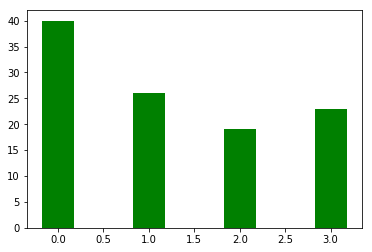

In [136]:
plt.bar(cu, cnt, width =0.35, color='g')
plt.show()

Text(0.5,0,'Degree')

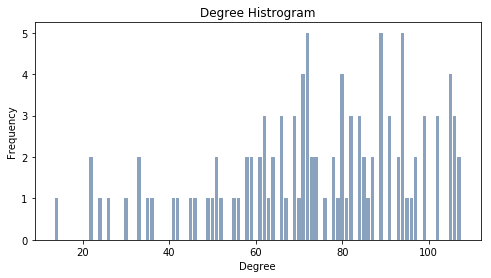

In [137]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

figure(figsize=(8,4))
plt.bar(deg, cnt, width=0.80, color=('#8AA2BE'))
plt.title('Degree Histrogram')
plt.ylabel('Frequency')
plt.xlabel('Degree')

In [144]:
centrality = nx.betweenness_centrality(G, weight='weight')
centrality = pd.DataFrame.from_dict(centrality, orient='index')
centrals = centrality.sort_values(by=[0], ascending=False).head(108)
centrals_list = top_10.index.tolist()

In [12]:
G.nodes()

NodeView(('Shot - Wounded/Injured', 'Mass Shooting', 'Possession', 'Possession of gun by felon or prohibited person', 'Shot - Dead', 'Gang involvement', 'Shots Fired - No Injuries', 'Bar/club incident - in or around establishment', 'Officer Involved Incident', 'Officer Involved Shooting - subject/suspect/perpetrator killed', 'Drug involvement', 'Kidnapping/abductions/hostage', 'Under the influence of alcohol or drugs', 'Suicide', 'Murder/Suicide', 'Attempted Murder/Suicide', 'Domestic Violence', 'Home Invasion', 'Home Invasion - Resident killed', 'Armed robbery with injury/death and/or evidence of DGU found', 'Drive-by', 'Officer Involved Shooting - Officer shot', 'Officer Involved Shooting - Officer killed', 'Officer Involved Shooting - subject/suspect/perpetrator shot', 'Officer Involved Shooting - subject/suspect/perpetrator suicide at standoff', 'Spree Shooting', 'Institution/Group/Business', 'Animal shot/killed', 'Home Invasion - Resident injured', 'Mass Murder', 'Concealed Carry 